# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np

#loading data direct fron github repositary
url = 'https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/compresive_strength_concrete.csv'
df = pd.read_csv(url, header=0)

# randomizing
data = df.sample(frac=1)

data.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
332,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,56,60.32
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.20
590,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,7,10.34
572,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,7,13.09
105,401.8,94.7,0.0,147.4,11.4,946.8,852.1,7,54.10


In [2]:
data.info()
# checked for NULL value, there is no null value.


#ndata = data.select_dtypes('number')# selecting only numbered columns
#for i in ndata.columns[ndata.isnull().any(axis=0)]:     #-Applying Only on variables with NaN values
#    ndata[i].fillna(ndata[i].mean(),inplace=True)       # although there is no NaN value, but generalizing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 332 to 646
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals) 

In [3]:
norm_data=(data-data.min())/(data.max()-data.min())

x=norm_data.iloc[:,:8]
y=norm_data.iloc[:,8:]

In [4]:
from sklearn.model_selection import train_test_split

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5  # 50%
ratio_test  = 0.3  # 30%
ratio_val   = 0.2  # 20%
# Produces 30% test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=ratio_test, random_state=42)

# Adjusts val ratio, w.r.t. remaining dataset 
ratio_remaining = 1 - ratio_test   # (70% left).
ratio_val_adjusted = ratio_val / ratio_remaining  # 20% of 70%

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [5]:
#Normalizing the data.

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_val -= mean
x_val /= std

x_test -= mean
x_test /= std

In [6]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1))

In [7]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#model.compile(optimizer='rmsprop',
#             loss='binary_crossentropy',
#             metrics='accuracy')

In [8]:
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=1,
                    validation_data=(x_val, y_val))

Epoch 1/40
514/514 [==============================] - 1s 1ms/step - loss: 0.1245 - mae: 0.2776 - val_loss: 0.0382 - val_mae: 0.1497
Epoch 2/40
514/514 [==============================] - 0s 926us/step - loss: 0.0312 - mae: 0.1421 - val_loss: 0.0214 - val_mae: 0.1165
Epoch 3/40
514/514 [==============================] - 0s 926us/step - loss: 0.0195 - mae: 0.1095 - val_loss: 0.0148 - val_mae: 0.0946
Epoch 4/40
514/514 [==============================] - 0s 910us/step - loss: 0.0135 - mae: 0.0916 - val_loss: 0.0138 - val_mae: 0.0883
Epoch 5/40
514/514 [==============================] - 0s 906us/step - loss: 0.0121 - mae: 0.0882 - val_loss: 0.0142 - val_mae: 0.0916
Epoch 6/40
514/514 [==============================] - 0s 880us/step - loss: 0.0104 - mae: 0.0800 - val_loss: 0.0112 - val_mae: 0.0788
Epoch 7/40
514/514 [==============================] - 0s 921us/step - loss: 0.0114 - mae: 0.0847 - val_loss: 0.0100 - val_mae: 0.0740
Epoch 8/40
514/514 [==============================] - 0s 970us/s

In [9]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

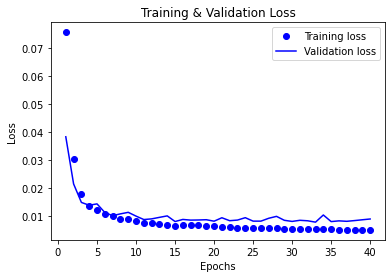

In [10]:
# evaluating validation loss

import matplotlib.pyplot as plt

history_dict=history.history
loss_value = history_dict['loss']
val_loss_value=history_dict['val_loss']
acc=history_dict['mae']   # missing in the book
val_acc=history_dict['val_mae']

epochs = np.arange(1, len(acc)+1)

plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

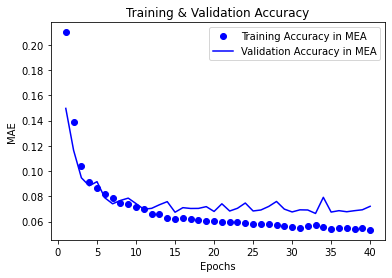

In [11]:
# evaluating validation accuracy

plt.plot(epochs, acc, 'bo', label='Training Accuracy in MEA')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy in MEA')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [12]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

display(test_mse_score, test_mae_score)

10/10 [==============================] - 0s 918us/step - loss: 0.0079 - mae: 0.0688


0.007854570634663105

0.06875289231538773

In [13]:
#The MSE and MAE graphis have less than 2% offset, which I could not correct.